In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data

city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Drop duplicates

city_data = city_data.drop_duplicates('city', keep='first')

# Combine the data into a single dataset

data = pd.merge(city_data, ride_data)

# Display the data table for preview

data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
byCity = data.groupby('city')

avgFare = byCity.mean()['fare']

totRides = byCity['ride_id'].count()

totDrivers = byCity.mean()['driver_count']

cityType = city_data.set_index('city')['type']

city_df = pd.DataFrame({
    "Number of Rides": totRides,
    "Average Fare": avgFare,
    "Number of Drivers": totDrivers,
    "Type of City": cityType
})

## Bubble Plot of Ride Sharing Data

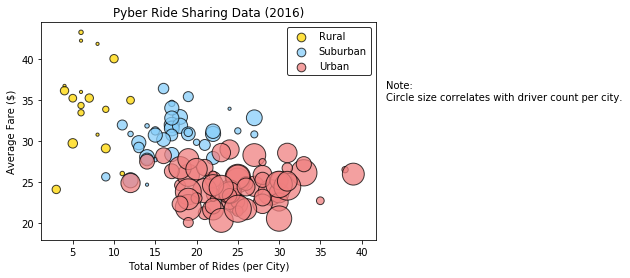

In [3]:
# Obtain the x and y coordinates for each of the three city types

rural = city_df[city_df['Type of City'] == 'Rural']
suburban = city_df[city_df['Type of City'] == 'Suburban']
urban = city_df[city_df['Type of City'] == 'Urban']

# Build the scatter plots for each city types
colors = {'Urban': '#F08080', 'Suburban': '#87CEFA', 'Rural': '#FFD700'}

plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10,
            color = colors['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10,
            color = colors['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10,
            color = colors['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)

# Create a legend
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (per City)')
plt.ylabel('Average Fare ($)')

lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

# Incorporate a text label regarding circle size
plt.text(43,35,'Note:\nCircle size correlates with driver count per city.')

# Save Figure
plt.savefig('pyberScatter.png')
plt.show()

## Total Fares by City Type

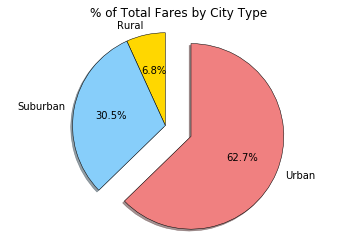

In [4]:
# Calculate Type Percents
byType = data.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

sumFares = byType.sum()['fare']

# Building Pie Chart

labels = sumFares.index
explode = [0 , 0, .3]
plt.pie(sumFares, startangle = 90, colors = ['#FFD700', '#87CEFA', '#F08080'],
        explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True,
        wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Fares by City Type')
plt.axis('equal')

# Save Figure
plt.savefig('pyberFaresByType.png')
plt.show()

## Total Rides by City Type

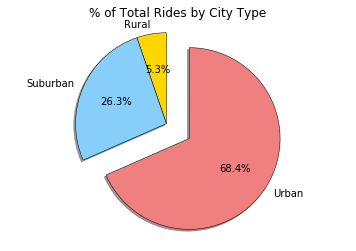

In [5]:
# Calculate Ride Percents
sumRides = byType.count()['ride_id']

# Build Pie Chart
labels = sumRides.index
plt.pie(sumRides, startangle = 90, explode = explode, colors = ['#FFD700', '#87CEFA', '#F08080'],
        labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Rides by City Type')
plt.axis('equal')

# Save Figure
plt.savefig('pyberRidesByType.png')
plt.show()

## Total Drivers by City Type

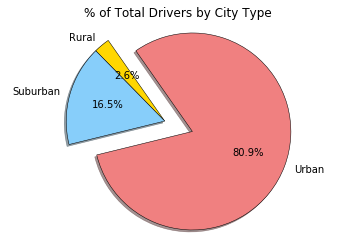

In [6]:
# Calculate Driver Percents
sumDrivers = city_data.groupby(['type'])['driver_count'].sum()
sumDrivers

# Build Pie Charts
labels = sumDrivers.index
plt.pie(sumDrivers, startangle = 125, explode = explode, colors = ['#FFD700', '#87CEFA', '#F08080'],
        labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Drivers by City Type')
plt.axis('equal')

# Save Figure
plt.savefig('pyberDriversByType.png')
plt.show()